## Experiment with hash functions

Our first programming project will implement min-hash and locality sensitive hashing as methods to find similar items in a dataset given a query item. A core operation in these methods is the use of hashing. In this notebook we will experiment a bit with hash functions
and make sure we get some python experience under our belts.

### Hash functions

(Based on Section 1.3.2 of Leskovec et al.)

- A hash function $h(x)=b$ takes *hash key* $x$ as input and returns a bucket number $b$ in the range $[0,B-1]$. 
- *Hash keys* can be values from any domain (integers, strings, arrays), for the moment we concentrate on integer hash keys $x \in [0,N]$ for some **very large** $N$.
- We want hash functions to "randomize" hash keys, that is, we want $h$ to uniformly (and randomly) distribute hash keys into $B$ buckets

### Our first hash function

Let's start with a simple class of hash functions: $h(x) = x \mod B$. Here is the python implementation of this function along with some applications

In [2]:
# first hash function here
def h1(x, B):
    return x % B

print(h1(0, 8))
print(h1(1, 8))
print(h1(5, 8))
print(h1(8, 8))

0
1
5
0


Let's apply the function to the list $[0,1,\ldots,99]$

In [3]:
y = [h1(x, 8) for x in range(100)]
y[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 0, 1]

Let's see how these values are distributed using a histogram

(array([13., 13., 13., 13., 12., 12., 12., 12.]),
 array([0.   , 0.875, 1.75 , 2.625, 3.5  , 4.375, 5.25 , 6.125, 7.   ]),
 <a list of 8 Patch objects>)

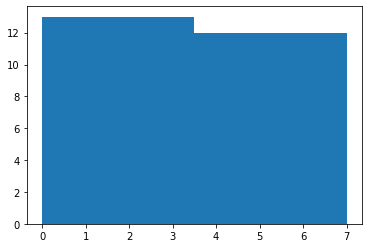

In [4]:
import matplotlib
import matplotlib.pyplot as plt

plt.hist(y, 8)

Let's try applying that function to a different list of numbers (even numbers)

(array([13.,  0., 13.,  0.,  0., 12.,  0., 12.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  , 3.75, 4.5 , 5.25, 6.  ]),
 <a list of 8 Patch objects>)

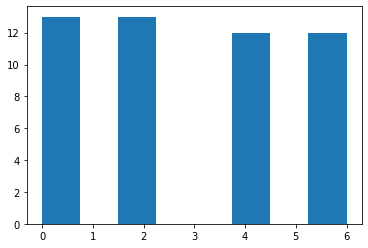

In [5]:
y = [h1(x, 8) for x in range(0, 100, 2)]
plt.hist(y, 8)

Did that work? Let's fix it if not.

(array([5., 4., 5., 4., 5., 4., 5., 4., 5., 4., 5.]),
 array([ 0.        ,  0.90909091,  1.81818182,  2.72727273,  3.63636364,
         4.54545455,  5.45454545,  6.36363636,  7.27272727,  8.18181818,
         9.09090909, 10.        ]),
 <a list of 11 Patch objects>)

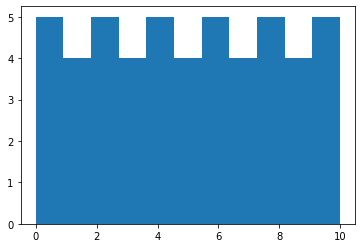

In [6]:
y = [h1(x, 11) for x in range(0, 100, 2)]
plt.hist(y, 11)

Did that work?

Some questions:

- Why did 11 work better than 8?
- What general property can we deduce about this class of hash functions?

### Using more than one hash function

In our next few systems we want to use multiple hash functions with the "randomization" property that produce independent values. Our current function does not satisfy that since every application will yield the same result. So how can we introduce better randomization?

We will extend our hash function to the form $h(x) = (ax + b) \mod B$ where $a$ and $b$ are random integers. Let's implement that:

In [7]:
# our second hash function here
import random
def make_hash(p=100, B=11):
    a = random.randint(1, p-1)
    b = random.randint(0, p-1)
    return lambda x: (a * x + b) % B

h1 = make_hash()
h2 = make_hash()


In [8]:
y1 = [h1(x) for x in range(0,100,2)]
y2 = [h2(x) for x in range(0,100,2)]

print(y1[:10])
print(y2[:10])

[6, 9, 1, 4, 7, 10, 2, 5, 8, 0]
[4, 6, 8, 10, 1, 3, 5, 7, 9, 0]


(array([4., 5., 4., 4., 5., 4., 5., 5., 4., 5., 5.]),
 array([ 0.        ,  0.90909091,  1.81818182,  2.72727273,  3.63636364,
         4.54545455,  5.45454545,  6.36363636,  7.27272727,  8.18181818,
         9.09090909, 10.        ]),
 <a list of 11 Patch objects>)

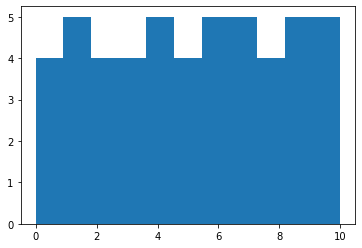

In [10]:
plt.hist(y1,11)

(array([4., 5., 4., 5., 5., 4., 5., 4., 5., 4., 5.]),
 array([ 0.        ,  0.90909091,  1.81818182,  2.72727273,  3.63636364,
         4.54545455,  5.45454545,  6.36363636,  7.27272727,  8.18181818,
         9.09090909, 10.        ]),
 <a list of 11 Patch objects>)

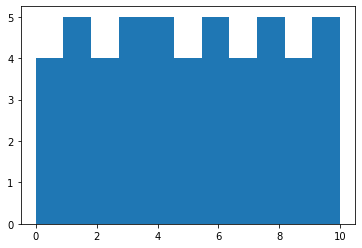

In [11]:
plt.hist(y2,11)

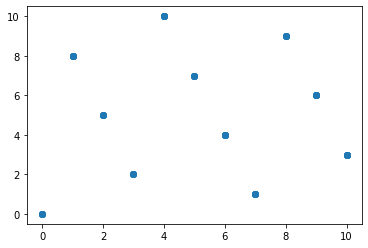

In [12]:
plt.plot(y1,y2,'o')

Not bad, but two more ideas:

(1) we want a large range of random numbers to avoid depdenence, so let's set $p$ to a very large number ($2^{33}-355$).
(2) for our applications next week, we can let $B$ very large since we are not building a hash table (you'll see how we use it next class) so we set $B$ to be pretty big (4294967295, a very large 32 bit prime integer)

In [28]:
import random
def make_hash(p=(2**33) - 355, B=4294967295):
    a = random.randint(1, p-1)
    b = random.randint(0, p-1)
    return lambda x: (a * x + b) % B

h1 = make_hash()
h2 = make_hash()

In [29]:
y1 = [h1(x) for x in range(0,100,2)]
y2 = [h2(x) for x in range(0,100,2)]

print(y1[:10])
print(y2[:10])

[2657022344, 1966481012, 1275939680, 585398348, 4189824311, 3499282979, 2808741647, 2118200315, 1427658983, 737117651]
[115840834, 268718326, 421595818, 574473310, 727350802, 880228294, 1033105786, 1185983278, 1338860770, 1491738262]


(array([5., 5., 4., 4., 4., 6., 4., 4., 4., 6., 4.]),
 array([4.65763190e+07, 4.29422062e+08, 8.12267805e+08, 1.19511355e+09,
        1.57795929e+09, 1.96080503e+09, 2.34365078e+09, 2.72649652e+09,
        3.10934226e+09, 3.49218801e+09, 3.87503375e+09, 4.25787949e+09]),
 <a list of 11 Patch objects>)

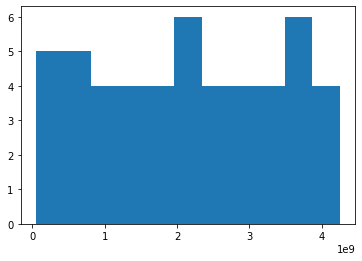

In [30]:
plt.hist(y1,11)

(array([6., 4., 6., 4., 6., 4., 6., 4., 5., 2., 3.]),
 array([1.01443315e+08, 4.77996933e+08, 8.54550552e+08, 1.23110417e+09,
        1.60765779e+09, 1.98421141e+09, 2.36076503e+09, 2.73731864e+09,
        3.11387226e+09, 3.49042588e+09, 3.86697950e+09, 4.24353312e+09]),
 <a list of 11 Patch objects>)

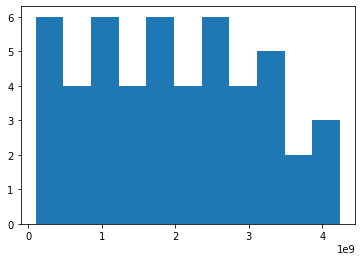

In [31]:
plt.hist(y2,11)

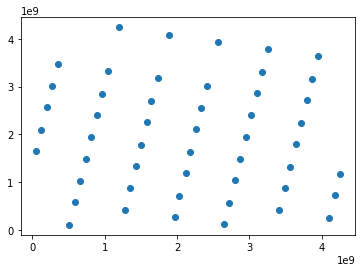

In [32]:
plt.plot(y1,y2,'o')